## 1. MNIST 데이터셋의 이해

### MNIST란?

*   MNIST (Modified National Institute of Standards and Technology database)
*   손으로 쓴 숫자(0~9) 이미지들을 모아 놓은 데이터셋




### 이미지 정보 확인

In [ ]:
# ! pip install torch
# ! pip install torchvision
# ! pip install matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 41.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 38.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 34.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 9.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 71.6 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitlink

In [2]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

100%|██████████| 9.91M/9.91M [00:00<00:00, 16.1MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 479kB/s]
100%|██████████| 1.65M/1.65M [00:00<00:00, 3.82MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 5.19MB/s]


shape: torch.Size([1, 28, 28])
type: <class 'torch.Tensor'>
pixel value: min = 0.0 , max = 1.0
label: 5


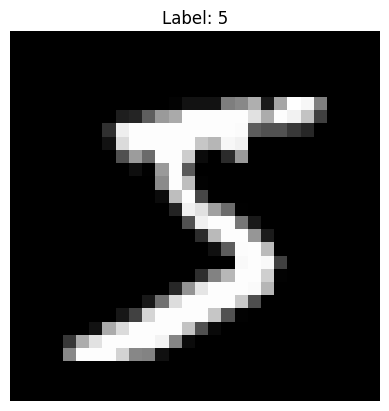

In [3]:
# 데이터 전처리: Tensor로 변환
transform = transforms.ToTensor()

# MNIST 학습 데이터셋 불러오기
train_dataset = datasets.MNIST(root='./data', train=True, download=True, transform=transform)

# 첫 번째 이미지와 라벨 확인
image, label = train_dataset[0]
print("shape:", image.shape)        # torch.Size([1, 28, 28])  1 채녈 = 흑백, 28x28
print("type:", type(image))          # torch.Tensor
print("pixel value: min =", image.min().item(), ", max =", image.max().item())  # 0.0 ~ 1.0 텐서로 변환했기 때문
print("label:", label)  # 0~9

plt.imshow(image.squeeze(), cmap='gray')
plt.title(f"Label: {label}")
plt.axis('off')
plt.show()

## 2. MNIST 분류 모델 구현

#### 데이터셋 로드

In [4]:
# MNIST는 흑백 이미지 → [0,1] 사이 실수값으로 정규화
transform = transforms.ToTensor()

train_dataset = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
test_dataset  = datasets.MNIST(root='./data', train=False, download=True, transform=transform)

# DataLoader는 데이터를 batch 단위로 불러와 줌
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader  = DataLoader(test_dataset, batch_size=64, shuffle=False)

#### 1. Logistic Regression

In [9]:
# Logistic Regression: 선형 계층 1개 (입력 784 → 출력 10)
model = nn.Sequential(
    nn.Flatten(),
    nn.Linear(28*28, 10)
)

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.1)

logistic_train_losses = []
logistic_test_losses = []

epochs = 10

for epoch in range(epochs):
    model.train()
    running_loss = 0.0

    for images, labels in train_loader:
        outputs = model(images)
        loss = criterion(outputs, labels)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    avg_train_loss = running_loss / len(train_loader)
    logistic_train_losses.append(avg_train_loss)

    # test loss 계산
    model.eval()
    test_loss = 0.0
    with torch.no_grad():
        for images, labels in test_loader:
            outputs = model(images)
            loss = criterion(outputs, labels)
            test_loss += loss.item()
    avg_test_loss = test_loss / len(test_loader)
    logistic_test_losses.append(avg_test_loss)

    print(f"[Epoch {epoch+1}] Train Loss: {avg_train_loss:.4f} / Test Loss: {avg_test_loss:.4f}")

# 최종 정확도 계산
model.eval()
correct = 0
total = 0

with torch.no_grad():
    for images, labels in test_loader:
        outputs = model(images)
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

logistic_test_accuracy = 100 * correct / total
print(f"Test Accuracy: {logistic_test_accuracy:.2f}%")

[Epoch 1] Train Loss: 0.4789 / Test Loss: 0.3365
[Epoch 2] Train Loss: 0.3370 / Test Loss: 0.3054
[Epoch 3] Train Loss: 0.3137 / Test Loss: 0.2951
[Epoch 4] Train Loss: 0.3023 / Test Loss: 0.2888
[Epoch 5] Train Loss: 0.2942 / Test Loss: 0.2829
[Epoch 6] Train Loss: 0.2890 / Test Loss: 0.2821
[Epoch 7] Train Loss: 0.2848 / Test Loss: 0.2780
[Epoch 8] Train Loss: 0.2812 / Test Loss: 0.2765
[Epoch 9] Train Loss: 0.2781 / Test Loss: 0.2757
[Epoch 10] Train Loss: 0.2757 / Test Loss: 0.2740
Test Accuracy: 92.29%


In [10]:
# MLP
# input: 784 (28*28) → hidden layer 128 → hidden layer 64 → outtput layer 10 (클래스 수)
model = nn.Sequential(
    nn.Flatten(),                 # (1,28,28) → (784,) 펼치기
    nn.Linear(784, 128),          # 첫 번째 hidden layer (784 → 128)
    nn.ReLU(),                    # 활성화 함수
    nn.Linear(128, 64),           # 두 번째 hidden layer (128 → 64)
    nn.ReLU(),                    # 다시 ReLU
    nn.Linear(64, 10)             # outtput layer (64 → 10): 클래스 점수 반환
)

criterion = nn.CrossEntropyLoss()           # 다중 클래스 분류 손실 함수
optimizer = optim.Adam(model.parameters(), lr=0.001)  # Adam 옵티마이저 (빠른 수렴)

epochs = 10
mlp_train_losses = []
mlp_test_losses = []

epochs = 10

for epoch in range(epochs):
    model.train()
    running_loss = 0.0

    for images, labels in train_loader:
        outputs = model(images)
        loss = criterion(outputs, labels)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    avg_train_loss = running_loss / len(train_loader)
    mlp_train_losses.append(avg_train_loss)

    # test loss 계산
    model.eval()
    test_loss = 0.0
    with torch.no_grad():
        for images, labels in test_loader:
            outputs = model(images)
            loss = criterion(outputs, labels)
            test_loss += loss.item()
    avg_test_loss = test_loss / len(test_loader)
    mlp_test_losses.append(avg_test_loss)

    print(f"[Epoch {epoch+1}] Train Loss: {avg_train_loss:.4f} / Test Loss: {avg_test_loss:.4f}")

# 최종 정확도 계산
model.eval()
correct = 0
total = 0

with torch.no_grad():
    for images, labels in test_loader:
        outputs = model(images)
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

mlp_test_accuracy = 100 * correct / total
print(f"Test Accuracy: {mlp_test_accuracy:.2f}%")

[Epoch 1] Train Loss: 0.3403 / Test Loss: 0.1713
[Epoch 2] Train Loss: 0.1421 / Test Loss: 0.1242
[Epoch 3] Train Loss: 0.0983 / Test Loss: 0.0933
[Epoch 4] Train Loss: 0.0742 / Test Loss: 0.0832
[Epoch 5] Train Loss: 0.0586 / Test Loss: 0.0738
[Epoch 6] Train Loss: 0.0458 / Test Loss: 0.0761
[Epoch 7] Train Loss: 0.0367 / Test Loss: 0.0719
[Epoch 8] Train Loss: 0.0311 / Test Loss: 0.0881
[Epoch 9] Train Loss: 0.0248 / Test Loss: 0.0892
[Epoch 10] Train Loss: 0.0229 / Test Loss: 0.0767
Test Accuracy: 97.92%


모델별 정확도 비교:


,Model,Test Accuracy (%)
0,Logistic Regression,92.29
1,MLP,97.92


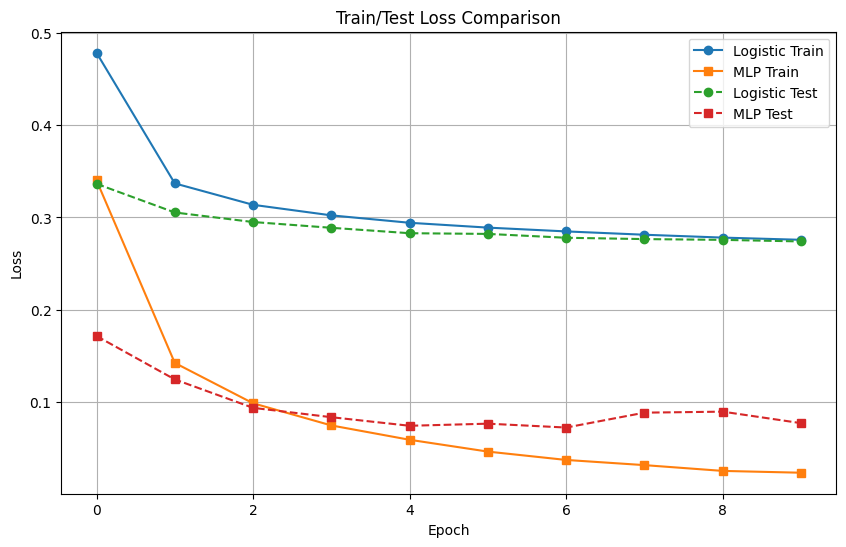

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

# 정확도 비교표 출력
comparison_df = pd.DataFrame({
    "Model": ["Logistic Regression", "MLP"],
    "Test Accuracy (%)": [logistic_test_accuracy, mlp_test_accuracy]
})

print("모델별 정확도 비교:")
display(comparison_df)

# loss 곡선 시각화 (Train & Test)
plt.figure(figsize=(10, 6))

# Train Loss
plt.plot(logistic_train_losses, label="Logistic Train", linestyle='-', marker='o')
plt.plot(mlp_train_losses, label="MLP Train", linestyle='-', marker='s')

# Test Loss
plt.plot(logistic_test_losses, label="Logistic Test", linestyle='--', marker='o')
plt.plot(mlp_test_losses, label="MLP Test", linestyle='--', marker='s')

plt.title("Train/Test Loss Comparison")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)
plt.show()

### MLP - 성능 개선

[Epoch 1] Loss: 0.2859
[Epoch 2] Loss: 0.1081
[Epoch 3] Loss: 0.0714
[Epoch 4] Loss: 0.0528
[Epoch 5] Loss: 0.0396
[Epoch 6] Loss: 0.0313
[Epoch 7] Loss: 0.0249
[Epoch 8] Loss: 0.0233
[Epoch 9] Loss: 0.0164
[Epoch 10] Loss: 0.0166
Test Accuracy: 98.00%


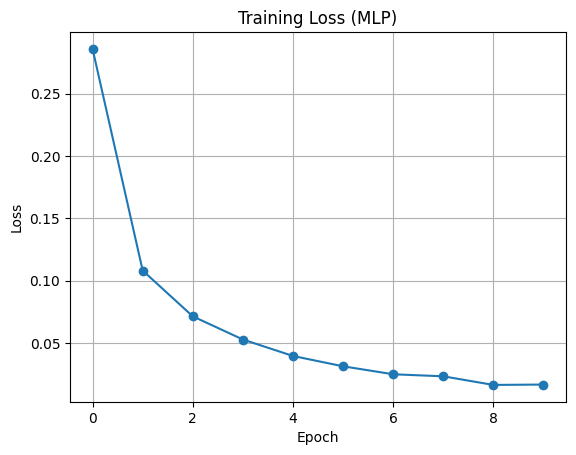

In [ ]:
# -----------------------------
# 실험 1) hidden layer 크기 증가 (128→256, 64→128)
# -----------------------------

# MLP
model = nn.Sequential(
    nn.Flatten(),
    nn.Linear(784, 256),
    nn.ReLU(),
    nn.Linear(256, 128),
    nn.ReLU(),
    nn.Linear(128, 10)
)

criterion = nn.CrossEntropyLoss()           # 다중 클래스 분류 손실 함수
optimizer = optim.Adam(model.parameters(), lr=0.001)  # Adam 옵티마이저 (빠른 수렴)

# 학습
epochs = 10
train_losses = []

for epoch in range(epochs):
    model.train()
    running_loss = 0.0

    for images, labels in train_loader:
        outputs = model(images)               # 모델 예측값
        loss = criterion(outputs, labels)     # 예측 vs 정답 비교 → 손실 계산

        optimizer.zero_grad()                 # 이전 gradient 초기화
        loss.backward()                       # 역전파: gradient 계산
        optimizer.step()                      # 파라미터 업데이트

        running_loss += loss.item()

    avg_loss = running_loss / len(train_loader)
    train_losses.append(avg_loss)
    print(f"[Epoch {epoch+1}] Loss: {avg_loss:.4f}")

# 평가
model.eval()
correct = 0
total = 0

with torch.no_grad():
    for images, labels in test_loader:
        outputs = model(images)
        _, predicted = torch.max(outputs, 1)  # 가장 높은 확률을 갖는 클래스 선택
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

accuracy = 100 * correct / total
print(f"Test Accuracy: {accuracy:.2f}%")

# loss 곡선 시각화
plt.plot(train_losses, marker='o')
plt.title("Training Loss (MLP)")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.grid(True)
plt.show()


[Epoch 1] Loss: 0.4606
[Epoch 2] Loss: 0.2116
[Epoch 3] Loss: 0.1691
[Epoch 4] Loss: 0.1430
[Epoch 5] Loss: 0.1272
[Epoch 6] Loss: 0.1188
[Epoch 7] Loss: 0.1070
[Epoch 8] Loss: 0.1020
[Epoch 9] Loss: 0.0952
[Epoch 10] Loss: 0.0910
Test Accuracy: 97.92%


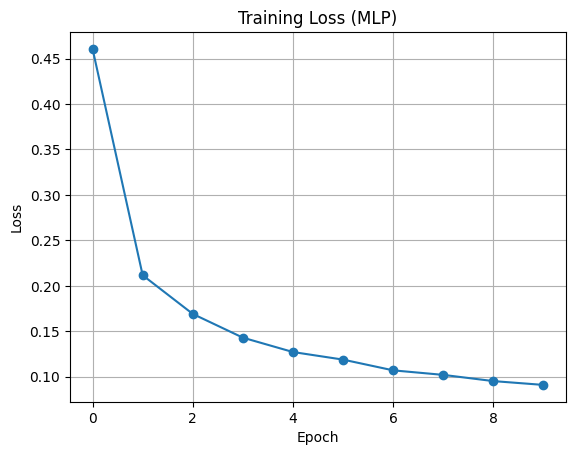

In [ ]:
# -----------------------------
# 실험 2) dropout 추가
# -----------------------------

# MLP
model = nn.Sequential(
    nn.Flatten(),
    nn.Linear(784, 128),
    nn.ReLU(),
    nn.Dropout(0.3),
    nn.Linear(128, 64),
    nn.ReLU(),
    nn.Dropout(0.3),
    nn.Linear(64, 10)
)

criterion = nn.CrossEntropyLoss()           # 다중 클래스 분류 손실 함수
optimizer = optim.Adam(model.parameters(), lr=0.001)  # Adam 옵티마이저 (빠른 수렴)

epochs = 10
train_losses = []

# 학습
for epoch in range(epochs):
    model.train()
    running_loss = 0.0

    for images, labels in train_loader:
        outputs = model(images)               # 모델 예측값
        loss = criterion(outputs, labels)     # 예측 vs 정답 비교 → 손실 계산

        optimizer.zero_grad()                 # 이전 gradient 초기화
        loss.backward()                       # 역전파: gradient 계산
        optimizer.step()                      # 파라미터 업데이트

        running_loss += loss.item()

    avg_loss = running_loss / len(train_loader)
    train_losses.append(avg_loss)
    print(f"[Epoch {epoch+1}] Loss: {avg_loss:.4f}")

# 평가
model.eval()
correct = 0
total = 0

with torch.no_grad():
    for images, labels in test_loader:
        outputs = model(images)
        _, predicted = torch.max(outputs, 1)  # 가장 높은 확률을 갖는 클래스 선택
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

accuracy = 100 * correct / total
print(f"Test Accuracy: {accuracy:.2f}%")


# loss 곡선 시각화
plt.plot(train_losses, marker='o')
plt.title("Training Loss (MLP)")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.grid(True)
plt.show()


[Epoch 1] Loss: 0.2566
[Epoch 2] Loss: 0.0923
[Epoch 3] Loss: 0.0671
[Epoch 4] Loss: 0.0555
[Epoch 5] Loss: 0.0414
[Epoch 6] Loss: 0.0365
[Epoch 7] Loss: 0.0318
[Epoch 8] Loss: 0.0278
[Epoch 9] Loss: 0.0254
[Epoch 10] Loss: 0.0221
Test Accuracy: 97.92%


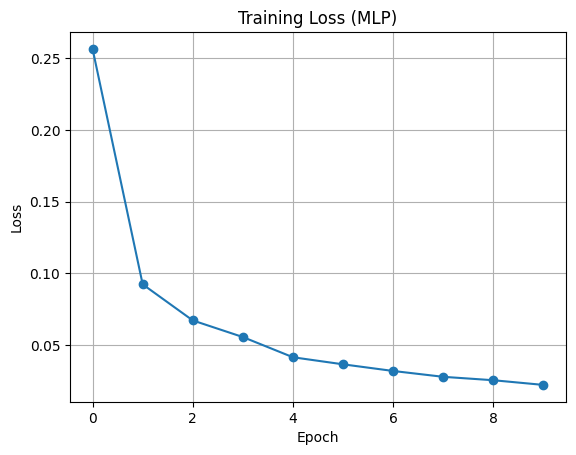

In [ ]:
# -----------------------------
# 실험 3) Batch Normalization 추가
# -----------------------------

# MLP
model = nn.Sequential(
    nn.Flatten(),
    nn.Linear(784, 128),
    nn.BatchNorm1d(128),
    nn.ReLU(),
    nn.Linear(128, 64),
    nn.BatchNorm1d(64),
    nn.ReLU(),
    nn.Linear(64, 10)
)

criterion = nn.CrossEntropyLoss()           # 다중 클래스 분류 손실 함수
optimizer = optim.Adam(model.parameters(), lr=0.001)  # Adam 옵티마이저 (빠른 수렴)

epochs = 10
train_losses = []

# 학습
for epoch in range(epochs):
    model.train()
    running_loss = 0.0

    for images, labels in train_loader:
        outputs = model(images)               # 모델 예측값
        loss = criterion(outputs, labels)     # 예측 vs 정답 비교 → 손실 계산

        optimizer.zero_grad()                 # 이전 gradient 초기화
        loss.backward()                       # 역전파: gradient 계산
        optimizer.step()                      # 파라미터 업데이트

        running_loss += loss.item()

    avg_loss = running_loss / len(train_loader)
    train_losses.append(avg_loss)
    print(f"[Epoch {epoch+1}] Loss: {avg_loss:.4f}")

# 평가
model.eval()
correct = 0
total = 0

with torch.no_grad():
    for images, labels in test_loader:
        outputs = model(images)
        _, predicted = torch.max(outputs, 1)  # 가장 높은 확률을 갖는 클래스 선택
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

accuracy = 100 * correct / total
print(f"Test Accuracy: {accuracy:.2f}%")

# loss 곡선 시각화
plt.plot(train_losses, marker='o')
plt.title("Training Loss (MLP)")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.grid(True)
plt.show()


[Epoch 1] Loss: 0.4065
[Epoch 2] Loss: 0.2069
[Epoch 3] Loss: 0.1700
[Epoch 4] Loss: 0.1540
[Epoch 5] Loss: 0.1386
[Epoch 6] Loss: 0.1328
[Epoch 7] Loss: 0.1210
[Epoch 8] Loss: 0.1151
[Epoch 9] Loss: 0.1128
[Epoch 10] Loss: 0.1058
Test Accuracy: 97.88%


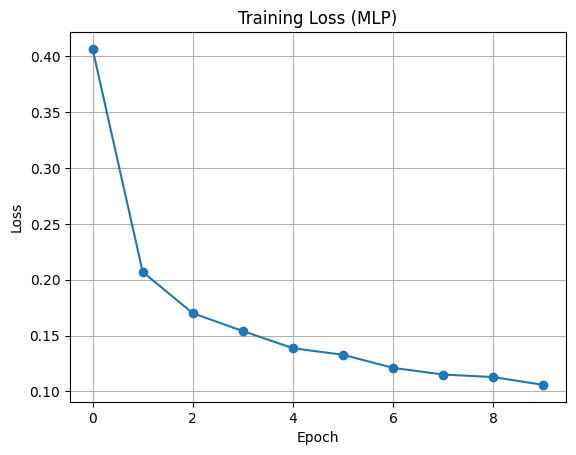

In [ ]:
# -----------------------------
# 실험 4) BatchNorm + Dropout
# -----------------------------

# MLP
model = nn.Sequential(
    nn.Flatten(),
    nn.Linear(784, 128),
    nn.BatchNorm1d(128),
    nn.ReLU(),
    nn.Dropout(0.3),
    nn.Linear(128, 64),
    nn.BatchNorm1d(64),
    nn.ReLU(),
    nn.Dropout(0.3),
    nn.Linear(64, 10)
)

criterion = nn.CrossEntropyLoss()           # 다중 클래스 분류 손실 함수
optimizer = optim.Adam(model.parameters(), lr=0.001)  # Adam 옵티마이저 (빠른 수렴)

# 학습
epochs = 10
train_losses = []

for epoch in range(epochs):
    model.train()
    running_loss = 0.0

    for images, labels in train_loader:
        outputs = model(images)               # 모델 예측값
        loss = criterion(outputs, labels)     # 예측 vs 정답 비교 → 손실 계산

        optimizer.zero_grad()                 # 이전 gradient 초기화
        loss.backward()                       # 역전파: gradient 계산
        optimizer.step()                      # 파라미터 업데이트

        running_loss += loss.item()

    avg_loss = running_loss / len(train_loader)
    train_losses.append(avg_loss)
    print(f"[Epoch {epoch+1}] Loss: {avg_loss:.4f}")


# 평가
model.eval()
correct = 0
total = 0

with torch.no_grad():
    for images, labels in test_loader:
        outputs = model(images)
        _, predicted = torch.max(outputs, 1)  # 가장 높은 확률을 갖는 클래스 선택
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

accuracy = 100 * correct / total
print(f"Test Accuracy: {accuracy:.2f}%")

# loss 곡선 시각화
plt.plot(train_losses, marker='o')
plt.title("Training Loss (MLP)")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.grid(True)
plt.show()

## 다음에 해보면 좋을 내용

### CNN 모델 적용
- CNN 이미지의 공간 구조 반영
---

### 잘못 예측한 이미지 시각화
- 테스트 데이터 중 **정답과 예측이 다른 이미지**를 출력
---

###  정확도(Accuracy) 변화 시각화
- Epoch별 정확도 변화 곡선을 추가하여 성능 추이 분석
- Loss와 함께 비교 시 학습 과정 이해에 도움

---

### 다양한 성능 개선 기법 실험(좀 더 자세히)
- Dropout, BatchNorm, Learning Rate 조정, Optimizer 변경 등
- 각 기법별 성능 비교 분석